# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. we'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where we can easily achieve better than 97% accuracy.00Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

here we are going to build our own neural network 

the first step is to load the data set , let's load the dataset through torchvision.

In [25]:
import torch
from torchvision import datasets, transforms
import helper
from torch import nn
import torch.nn.functional as F
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

let's check that our dataser is loaded properly by showuing it 

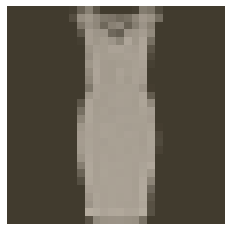

In [26]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define our network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [53]:
 # Defining  our network architecture here
# Build a feed-forward network

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1)) 
"""
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.f1 = nn.Linear(784,256)
        self.f2 = nn.Linear(256,128)
        self.f3 = nn.Linear(128,64)
        self.f4 = nn.Linear(64,10)
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.f1(x))
        x = F.relu(self.f2(x))
        x = F.relu(self.f3(x))
        x = F.log_softmax(self.f4(x), dim = 1)
        
        return x  """

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


# Train the network

Now we will create our network and train it. First we'll want to define [the criterion]( something like `nn.CrossEntropyLoss`) and [the optimizer]
(typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc),we should be able to get the training loss below 0.4.

In [54]:
from torch import optim
# TODO: Create the network, define the criterion and optimizer
#model = Classifier()
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr = 0.001)

# Make a forward pass throgh the network to get the logit 


In [56]:
# TODO: Train the network here

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5123359364773165
Training loss: 0.3754687058582489
Training loss: 0.34163195542943503
Training loss: 0.3139540977648962
Training loss: 0.2964204120785316


In [59]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)
img2 = img.resize_(1, 28, 28)
# TODO: Calculate the class probabilities (softmax) for img
ps = print(f"Training loss: {running_loss/len(trainloader)}")
ps2 = torch.exp(model(img))
# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')

Training loss: 0.2964204120785316


RuntimeError: size mismatch, m1: [28 x 28], m2: [784 x 128] at C:\w\1\s\windows\pytorch\aten\src\TH/generic/THTensorMath.cpp:197

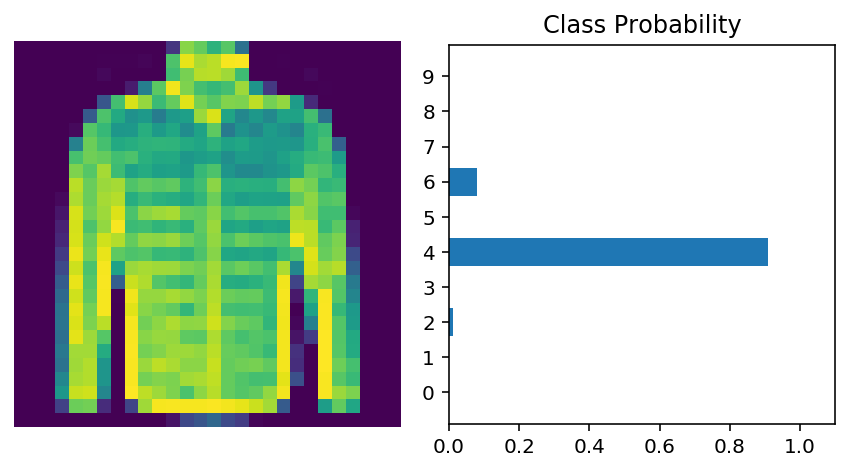

In [60]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)